In [2]:
# Figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('default') # set to your personal preference
import matplotlib.font_manager
import matplotlib.font_manager
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the figure title

#import seaborn as sns
#sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)

# Ipython notebook basics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.setrecursionlimit(5000)

# Things I use everytime
import numpy as np
np.random.seed(42)
import pandas as pd
import scipy.stats as stats


## Example of how to plot the similarity across the genome for a single pair of individuals

In [63]:
pair = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/pairwiseComparisons/3dcomp_EUR_FIN_female_HG00285_vs_vindija.txt",sep="\t")
pair.head()

,chr,windowStartPos,mse,spearman,triangle_mse,triangle_spearman,insulation_spearman
0,chr1,0,0.006221,0.976632,0.000521,0.987378,0.986367
1,chr1,524288,0.000708,0.998556,0.000081,0.998552,0.996927
2,chr1,1048576,0.001309,0.997306,0.000029,0.999782,0.998156
3,chr1,1572864,0.001585,0.995972,0.000164,0.997606,0.996876
4,chr1,2097152,0.004564,0.983062,0.000308,0.996790,0.990035


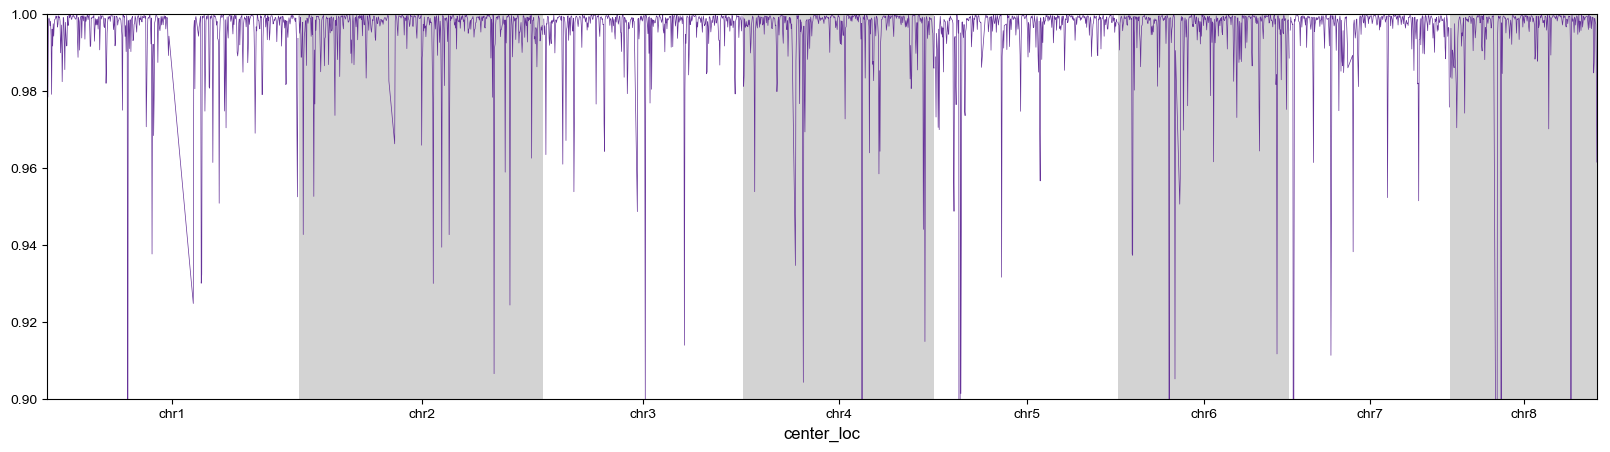

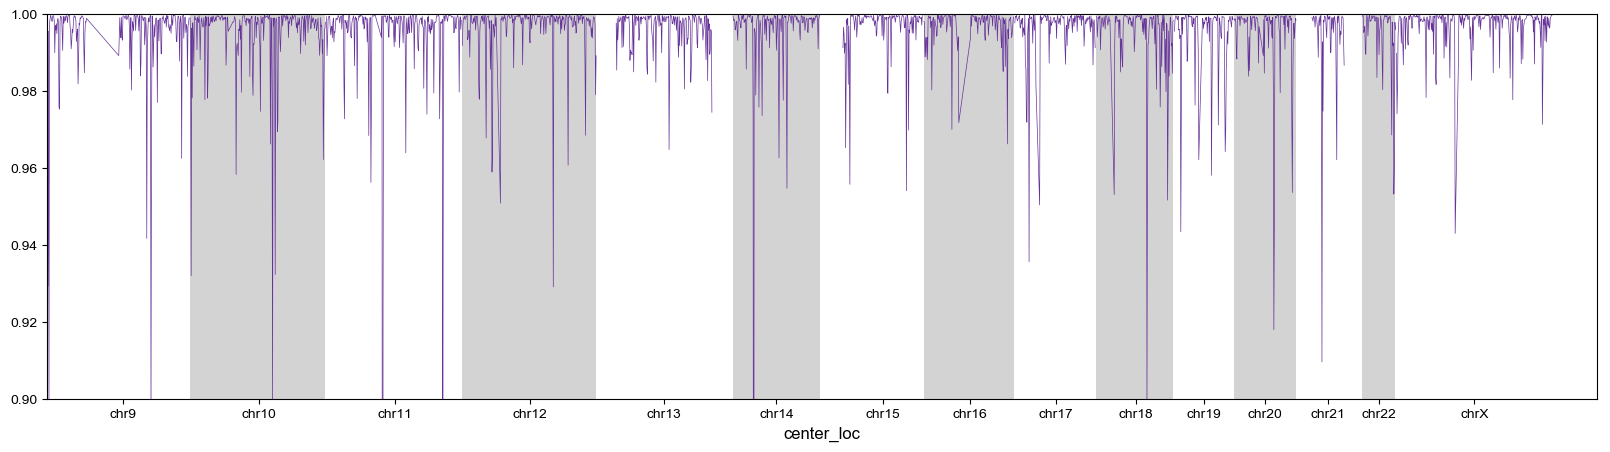

In [64]:
chroms = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8'] # did this to split the plot into a top panel and bottom, but you could just put all chroms here for 1 linear plot

fig = plt.figure(figsize=(20,5))
x_labels = []
x_labels_pos = []
ax = fig.add_subplot(111)
ax.set_facecolor('white')

pair = pairs[('AFR_ESN_female_HG03105','altai')]

maxLoc = 0
num = 0
for chrm in chroms:
    num+=1
    pair['center_loc'] = (pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
    _ = pair[pair['chr'] == chrm].plot(kind='line',x='center_loc',y='spearman',color='rebeccapurple', ax=ax, alpha=1, linewidth=0.5)
    maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 # max loc iteratively becomes larger with each chromosome to place everything on the same x-axis. Remove the + 10 if you don't want space between the chroms
    x_labels_pos.append(pair[pair['chr'] == chrm]['center_loc'].mean()) # save the position for the xlabels
    if (num % 2) == 0: # alternate gray and white background
        _ = ax.axvspan(pair[pair['chr'] == chrm]['center_loc'].min(), pair[pair['chr'] == chrm]['center_loc'].max(), facecolor='lightgray')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.get_legend().remove()
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.9,1)
maxLocOld = maxLoc
plt.show()

# second half of the fig

chroms = ['chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX']
fig = plt.figure(figsize=(20,5))
x_labels = []
x_labels_pos = []

ax = fig.add_subplot(111)
maxLoc = 0
num = 0
for chrm in chroms:
    num+=1
    pair['center_loc'] = (pair['windowStartPos'] + 2**20)/2 + maxLoc
    _ = pair[pair['chr'] == chrm].plot(kind='line',x='center_loc',y='spearman',color='rebeccapurple', ax=ax, linewidth=0.5)
    maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10
    x_labels_pos.append(pair[pair['chr'] == chrm]['center_loc'].mean())
    if (num % 2) == 0:
        _ = ax.axvspan(pair[pair['chr'] == chrm]['center_loc'].min(), pair[pair['chr'] == chrm]['center_loc'].max(), facecolor='lightgray')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.get_legend().remove()
_ = ax.set_xlim(0,maxLocOld) # this is to scale so the top panel and bottom panel have the same scale (will leave some white space behind the x chrom)
_ = ax.set_ylim(0.9,1)

## Read in all pairwise comparisons and genome-coverage into a dictionary

In [3]:
coverage = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_AFR_GWD_female_HG03539.txt",sep="\t",header=None)
coverage.columns= ['chr','windowStartPos','coverage','masked_coverage']
regionsToKeep = coverage[coverage['coverage'] == 1][['chr','windowStartPos']]
len(regionsToKeep) # only keep regions with full coverage in 1kg!!

4999

In [5]:
# This takes a few minutes
indivs = ['chagyrskaya', 'denisova', 'altai' ,'vindija','AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870', 'AFR_YRI_female_NA19159', 'EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851', 'EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']

pairs = {}
for i1 in indivs:
    print(i1)
    for i2 in indivs:
        try:
            pair = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/pairwiseComparisons/3dcomp_%s_vs_%s.txt" % (i1,i2),sep="\t")
            coverage1 = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_%s.txt" % i1,sep="\t",header=None)
            coverage1.columns = ['chr','windowStartPos','%s_coverage'% i1,'masked_coverage']
            coverage2 = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_%s.txt" % i2,sep="\t",header=None)
            coverage2.columns = ['chr','windowStartPos','%s_coverage'% i2,'masked_coverage']
            pair = pair.merge(coverage1).merge(coverage2)
            pair = regionsToKeep.merge(pair, how='inner',on=['chr','windowStartPos']) # only keep windows with full coverage in 1kg
            pairs[(i1,i2)] = pair
        except FileNotFoundError:
            pass

pairs[('altai','chagyrskaya')].head()
len(pairs) # should be 190 when all pair-wise comparisons are finished


chagyrskaya
denisova
altai
vindija
AFR_ESN_female_HG03105
AFR_GWD_female_HG03539
AFR_LWK_female_NA19378
AFR_MSL_female_HG03212
AFR_YRI_female_NA18870
AFR_YRI_female_NA19159
EAS_CDX_female_HG00978
EAS_CHB_female_NA18595
EAS_CHS_female_HG00560
EAS_JPT_female_NA19077
EAS_KHV_female_HG01851
EUR_CEU_female_NA12006
EUR_FIN_female_HG00285
EUR_GBR_female_HG00261
EUR_IBS_female_HG01519
EUR_TSI_female_NA20795


,chr,windowStartPos,mse,spearman,triangle_mse,triangle_spearman,insulation_spearman,altai_coverage,masked_coverage,chagyrskaya_coverage
0,chr1,524288,0.000049,0.999901,4.745326e-06,0.999922,0.999617,0.445566,0.443856,0.445396
1,chr1,1048576,0.000028,0.999948,1.799373e-06,0.999985,0.999688,0.570948,0.569921,0.570571
2,chr1,1572864,0.000219,0.999428,3.506708e-05,0.999574,0.998922,0.644570,0.643854,0.644262
3,chr1,4194304,0.000144,0.997310,2.901225e-05,0.998961,0.997824,0.751499,0.751086,0.751260
4,chr1,4718592,0.000016,0.999753,8.135833e-07,0.999812,0.999144,0.762431,0.762168,0.762219


190

In [94]:
len(pairs[('vindija','altai')])


4999

## Plot all pairwise comparisons with 1 individual (Example with Altai)

In [38]:
amh = ['AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870', 'AFR_YRI_female_NA19159', 'EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851', 'EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']
amh_afr = ['AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870', 'AFR_YRI_female_NA19159']
amh_eas = ['EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851']
amh_eur = ['EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']
altai_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
for i in amh:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman']]
    pair.columns = ['chr','windowStartPos',i]
    altai_comps = altai_comps.merge(pair, on =['chr','windowStartPos'],how='outer')

altai_comps[altai_comps['chr'] == 'chr18'].head()

,chr,windowStartPos,AFR_ESN_female_HG03105,AFR_GWD_female_HG03539,AFR_LWK_female_NA19378,AFR_MSL_female_HG03212,AFR_YRI_female_NA18870,AFR_YRI_female_NA19159,EAS_CDX_female_HG00978,EAS_CHB_female_NA18595,EAS_CHS_female_HG00560,EAS_JPT_female_NA19077,EAS_KHV_female_HG01851,EUR_CEU_female_NA12006,EUR_FIN_female_HG00285,EUR_GBR_female_HG00261,EUR_IBS_female_HG01519,EUR_TSI_female_NA20795
4306,chr18,524288,0.999339,0.998584,0.999101,0.999276,0.999280,0.999123,0.999147,0.999453,0.999355,0.999181,0.999141,0.999009,0.999378,0.999193,0.999362,0.999244
4307,chr18,1048576,0.994155,0.997787,0.995944,0.997906,0.996764,0.997801,0.997514,0.996859,0.997430,0.999155,0.997219,0.998314,0.998389,0.997662,0.998111,0.998764
4308,chr18,1572864,0.996533,0.996627,0.997418,0.997404,0.997256,0.997804,0.997333,0.997910,0.995200,0.998416,0.998385,0.998392,0.997772,0.997688,0.998150,0.998124
4309,chr18,2097152,0.999363,0.998287,0.999546,0.999340,0.985503,0.999169,0.999351,0.999628,0.999086,0.999431,0.999693,0.999497,0.999449,0.998667,0.999406,0.999467
4310,chr18,2621440,0.998912,0.997717,0.999681,0.998708,0.997310,0.998937,0.999344,0.999315,0.998980,0.999121,0.999532,0.999442,0.999574,0.998566,0.999526,0.999245


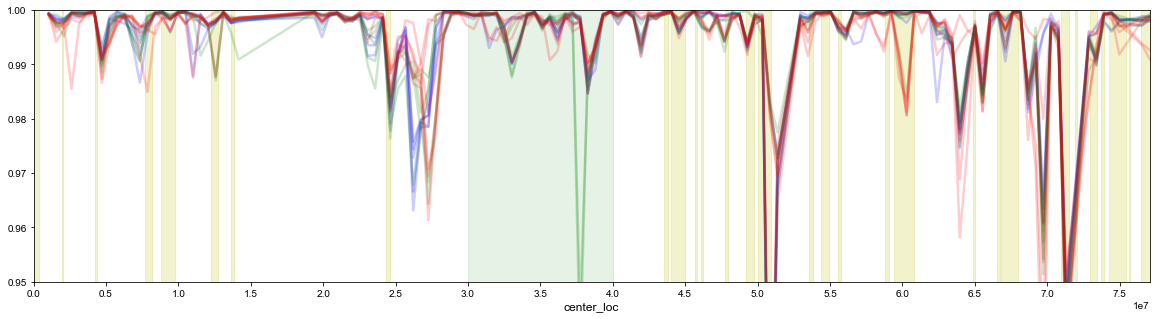

In [115]:
# adjust these
chrm = 'chr18'
pair = altai_comps


fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

#start = 50500000 # adjust
#end = 51500000 #adjust


num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
for i in amh_eur:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start-2**20 ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='blue', ax=ax, alpha=0.2, linewidth=2.5)
for i in amh_eas:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start-2**20 ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='g', ax=ax, alpha=0.2, linewidth=2.5)
for i in amh_afr:
    _ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start-2**20 ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=i,color='r', ax=ax, alpha=0.2, linewidth=2.5)

maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks(np.arange(0,maxLoc,5000000))
_ = ax.get_legend().remove()
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.92,1)
#plt.show()


#fig = plt.figure(figsize=(20,5))
#ax = fig.add_subplot(111)

# Read in vernot, browning segments and sankararaman deserts
vernot_segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
vernot_segs = vernot_segs[vernot_segs[0]==chrm]
vernot_segs['len'] = vernot_segs[2] - vernot_segs[1]
#_ = plt.broken_barh([(i,j) for i,j in zip(vernot_segs[1],vernot_segs['len'])], (0,1),color='darkorange',alpha=0.16)

sprime_segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
sprime_segs = sprime_segs[sprime_segs[0]==chrm]
sprime_segs['len'] = sprime_segs[2] - sprime_segs[1]
_ = plt.broken_barh([(i,j) for i,j in zip(sprime_segs[1],sprime_segs['len'])], (0,1),color='y',alpha=0.2)

deserts = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
deserts.iloc[:,0] = deserts.iloc[:,0].apply(lambda x: 'chr%s' % x)
deserts['len'] = deserts[2] - deserts[1]
deserts = deserts[deserts[0]==chrm]
_ = plt.broken_barh([(i,j) for i,j in zip(deserts[1],deserts['len'])], (0,1),color='g',alpha=0.1)

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist = blacklist[blacklist[0]==chrm]
blacklist[1] = blacklist[1] - 2**20/2
blacklist[2] = blacklist[2] + 2**20/2
blacklist['len'] = blacklist[2] - blacklist[1]
#_ = plt.broken_barh([(i,j) for i,j in zip(blacklist[1],blacklist['len'])], (0,1),color='k',alpha=0.2)

_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.95,1)

_ = ax.set_xticks(np.arange(0,maxLoc,5000000))


plt.show()

## Generate clustermaps for pairwise similiarity

### Heat map (no clustering)

In [97]:
pairs_matrix = pd.DataFrame(index=indivs,columns=indivs,dtype='float')
for k,v in pairs.items():
    pairs_matrix.loc[k[0],k[1]] = v.mean()['spearman']
    pairs_matrix.loc[k[1],k[0]] = v.mean()['triangle_spearman']


for i in indivs:
    pairs_matrix.loc[i,i] = 1
#pairs_matrix.fillna(0)
len(pairs)
        

190

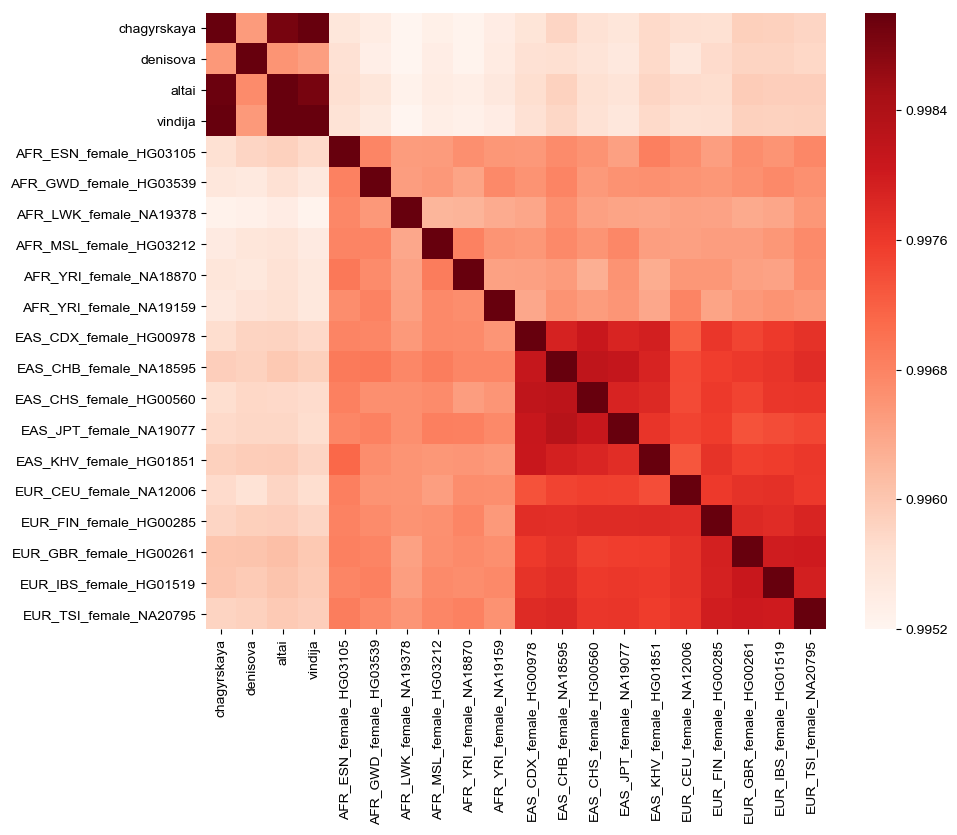

In [98]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(pairs_matrix,cmap='Reds',vmax=0.999)

### Clustermap whole genome

In [99]:
import random
for i in indivs:
    for j in indivs:
        try:
            pairs_matrix.loc[i,j] = pairs[(i,j)].mean()['spearman']
            pairs_matrix.loc[j,i] = pairs[(i,j)].mean()['spearman']
        except:
            try:
                pairs_matrix.loc[i,j] = pairs[(j,i)].mean()['spearman']
                pairs_matrix.loc[j,i] = pairs[(j,i)].mean()['spearman']
            except:
                pass
                
for i in indivs:
    pairs_matrix.loc[i,i] = 1
    

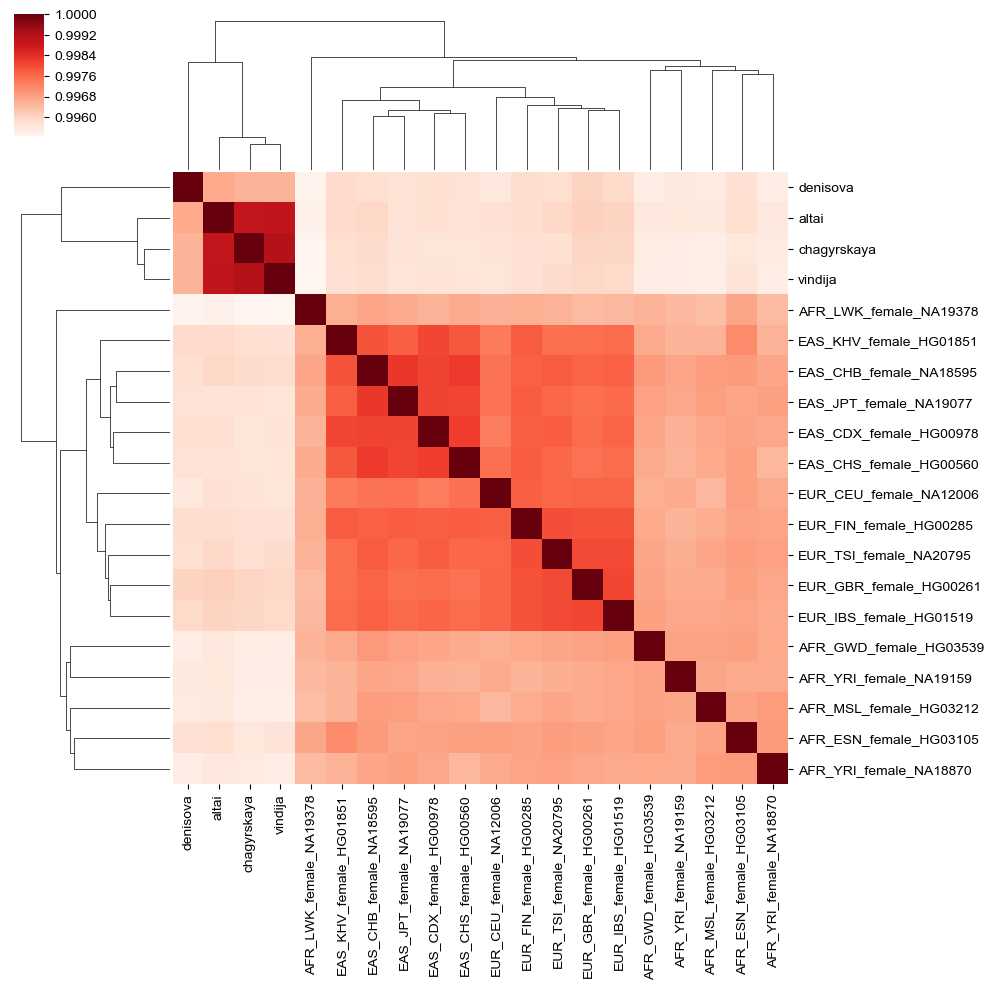

In [100]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(1 - pairs_matrix), method='complete') # complete, single, average, weighted
g = sns.clustermap(pairs_matrix, cmap="Reds", row_linkage=linkage, col_linkage=linkage) #vmax=0.999

### Clustermap part of genome

In [101]:
# for a region, change chrom, start, end
chrom = 'chr18'
start = 59569521
end = 60089689
start =0
end =4000000000000000
import random
for i in indivs:
    for j in indivs:
        try:
            pair = pairs[(i,j)]
            region = pair[(pair['chr'] == chrom) & (pair['windowStartPos'] >= start) & (pair['windowStartPos'] <= end + 2**20)]
            pairs_matrix.loc[i,j] = region.mean()['spearman']
            pairs_matrix.loc[j,i] = region.mean()['spearman']
        except:
            try:
                pair = pairs[(j,i)]
                region = pair[(pair['chr'] == chrom) & (pair['windowStartPos'] >= start) & (pair['windowStartPos'] <= end + 2**20)]
                pairs_matrix.loc[i,j] = region.mean()['spearman']
                pairs_matrix.loc[j,i] = region.mean()['spearman']
            except:
                pass
for i in indivs:
    pairs_matrix.loc[i,i] = 1
    

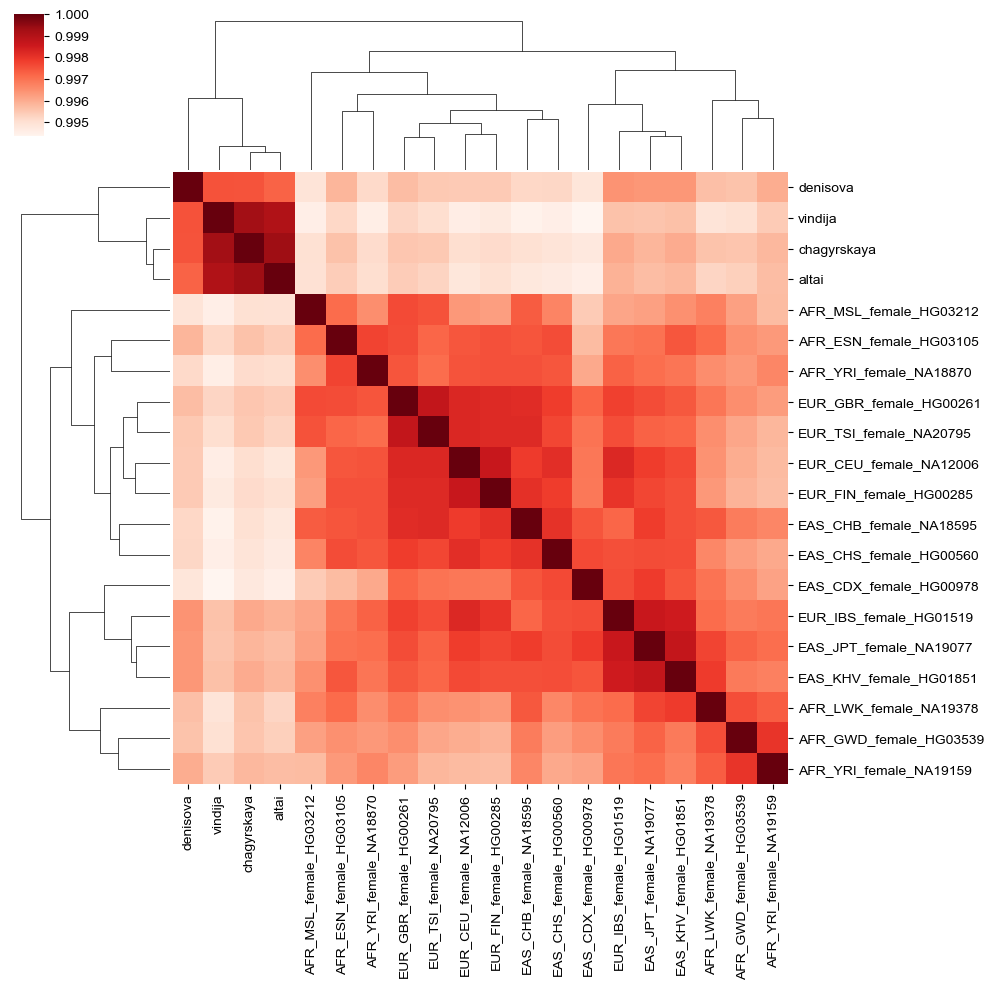

In [102]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(1 - pairs_matrix), method='complete') # complete, single, average, weighted
g = sns.clustermap(pairs_matrix, cmap="Reds", row_linkage=linkage, col_linkage=linkage) #vmax=0.999

## Compare the different comparison metrics

spearman               0.607360
triangle_spearman      0.657382
insulation_spearman    0.713762
dtype: float64

mse    0.022101
dtype: float64

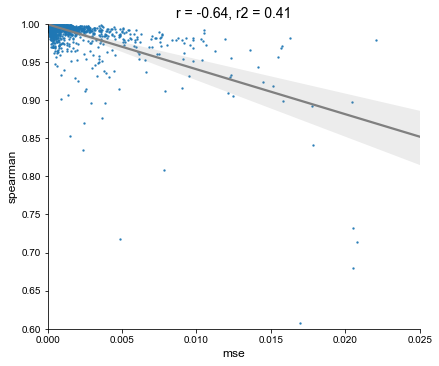

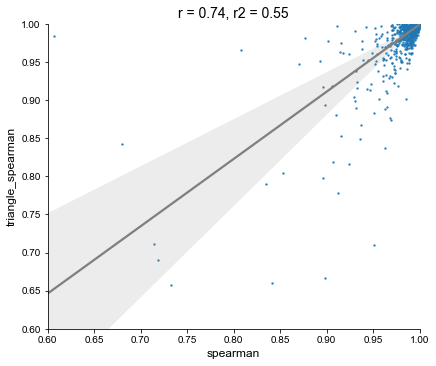

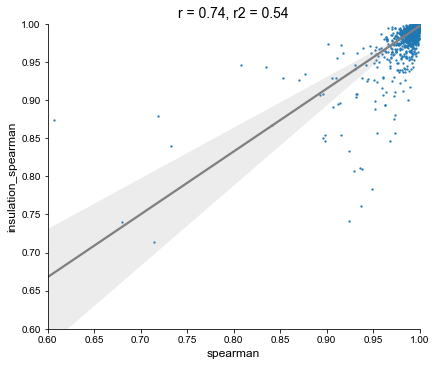

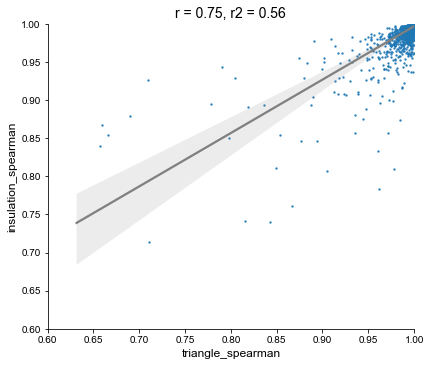

In [30]:
pairs[('AFR_ESN_female_HG03105','altai')][['spearman','triangle_spearman','insulation_spearman']].min()
pairs[('AFR_ESN_female_HG03105','altai')][['mse']].max()

g = sns.lmplot(x='mse',y='spearman',data=pairs[('AFR_ESN_female_HG03105','altai')],scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
_ = g.set(xlim=(0,0.025))
_ = g.set(ylim=(0.6,1))
slope, intercept, r, p, se = stats.linregress(pairs[('AFR_ESN_female_HG03105','altai')]['mse'].values, pairs[('AFR_ESN_female_HG03105','altai')]['spearman'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

g = sns.lmplot(x='spearman',y='triangle_spearman',data=pairs[('AFR_ESN_female_HG03105','altai')],scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
_ = g.set(xlim=(0.6,1))
_ = g.set(ylim=(0.6,1))
slope, intercept, r, p, se = stats.linregress(pairs[('AFR_ESN_female_HG03105','altai')]['spearman'].values, pairs[('AFR_ESN_female_HG03105','altai')]['triangle_spearman'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

g = sns.lmplot(x='spearman',y='insulation_spearman',data=pairs[('AFR_ESN_female_HG03105','altai')],scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
_ = g.set(xlim=(0.6,1))
_ = g.set(ylim=(0.6,1))
slope, intercept, r, p, se = stats.linregress(pairs[('AFR_ESN_female_HG03105','altai')]['spearman'].values, pairs[('AFR_ESN_female_HG03105','altai')]['insulation_spearman'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))

g = sns.lmplot(x='triangle_spearman',y='insulation_spearman',data=pairs[('AFR_ESN_female_HG03105','altai')],scatter_kws={'s':2}, line_kws={'color': 'gray'},aspect=1.2)
_ = g.set(xlim=(0.6,1))
_ = g.set(ylim=(0.6,1))
slope, intercept, r, p, se = stats.linregress(pairs[('AFR_ESN_female_HG03105','altai')]['triangle_spearman'].values, pairs[('AFR_ESN_female_HG03105','altai')]['insulation_spearman'].values)
_ = plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))



In [36]:
## Find some regions with differences between metrics

findDiff = pairs[('AFR_ESN_female_HG03105','altai')]
findDiff['spearman_triangle_diff'] = np.abs(findDiff['spearman'] - findDiff['triangle_spearman'])
findDiff.sort_values(by='spearman_triangle_diff',ascending=False)[['chr','windowStartPos','spearman','triangle_spearman','spearman_triangle_diff']].head(10)

,chr,windowStartPos,spearman,triangle_spearman,spearman_triangle_diff
1557,chr5,23592960,0.607360,0.984362,0.377002
2220,chr7,40894464,0.950529,0.709489,0.241040
995,chr3,100663296,0.897992,0.666210,0.231781
138,chr1,79167488,0.841568,0.659469,0.182099
3177,chr11,55574528,0.680231,0.842410,0.162179
2148,chr7,3145728,0.808146,0.965592,0.157446
2123,chr6,157810688,0.911825,0.777844,0.133981
3084,chr10,132120576,0.962306,0.836694,0.125612
761,chr2,209190912,0.924512,0.815669,0.108843
3283,chr11,115343360,0.876501,0.982096,0.105595


## Compare introgressed vs non-introgressed windows and their 3D genome correlation

### Focus on "window"-level

In [39]:
afr_altai_comps = pd.DataFrame([], columns=['chr','windowStartPos','masked_coverage'])
for i in amh_afr:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman','masked_coverage']]
    pair.columns = ['chr','windowStartPos',i,'masked_coverage']
    afr_altai_comps = afr_altai_comps.merge(pair, on =['chr','windowStartPos','masked_coverage'],how='outer')
afr_altai_comps['end'] = afr_altai_comps['windowStartPos']+2**20
afr_altai_comps = afr_altai_comps[['chr','windowStartPos','end','masked_coverage'] + amh_afr]
afr_altai_comps.head()


,chr,windowStartPos,end,masked_coverage,AFR_ESN_female_HG03105,AFR_GWD_female_HG03539,AFR_LWK_female_NA19378,AFR_MSL_female_HG03212,AFR_YRI_female_NA18870,AFR_YRI_female_NA19159
0,chr1,524288,1572864,0.443856,0.998616,0.997645,0.998379,0.997930,0.998480,0.998232
1,chr1,1048576,2097152,0.569921,0.999060,0.997341,0.997412,0.997641,0.998356,0.998564
2,chr1,1572864,2621440,0.643854,0.998527,0.998667,0.996695,0.998567,0.997834,0.997839
3,chr1,4194304,5242880,0.751086,0.996185,0.992321,0.997539,0.998718,0.992224,0.993073
4,chr1,4718592,5767168,0.762168,0.991800,0.990736,0.988684,0.993680,0.988444,0.989545


,chr,windowStartPos,end,masked_coverage,AFR_ESN_female_HG03105,AFR_GWD_female_HG03539,AFR_LWK_female_NA19378,AFR_MSL_female_HG03212,AFR_YRI_female_NA18870,AFR_YRI_female_NA19159,overlap,overlap_percent
0,chr1,0,1048576,0.147495,0.978577,0.985337,0.985010,0.991031,0.988429,0.979681,0,0.000000
1,chr1,524288,1572864,0.443856,0.998616,0.997645,0.998379,0.997930,0.998480,0.998232,0,0.000000
2,chr1,1048576,2097152,0.569921,0.999060,0.997341,0.997412,0.997641,0.998356,0.998564,0,0.000000
3,chr1,1572864,2621440,0.643854,0.998527,0.998667,0.996695,0.998567,0.997834,0.997839,252210,0.240526
4,chr1,2097152,3145728,0.735148,0.997018,0.996538,0.997372,0.994647,0.988369,0.990681,521410,0.497255


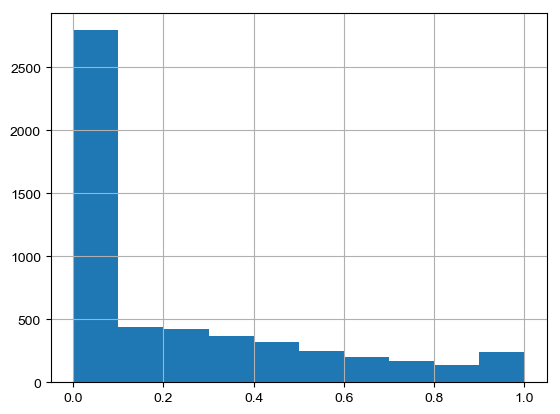

In [107]:
from pybedtools import BedTool

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist[1] = blacklist[1]# - 2**20/2
blacklist[2] = blacklist[2] #+ 2**20/2
blacklist[[1,2]] = blacklist[[1,2]].clip(0).astype(int)

blacklist_bed = BedTool.from_dataframe(blacklist)
afr_altai_comps_bed = BedTool.from_dataframe(afr_altai_comps)

# uncomment if you want to exclude blacklist
#afr_altai_comps_bed = afr_altai_comps_bed.intersect(blacklist_bed,v=True) #3494 out of 5334

#browning
segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
#vernot
#segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
#deserts
#segs = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
#segs = segs.iloc[:,0:3] 
#segs.iloc[:,0] = segs.iloc[:,0].apply(lambda x: 'chr%s' % x)

segs = BedTool.from_dataframe(segs)
intersect = afr_altai_comps_bed.intersect(segs.merge(),wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = list(afr_altai_comps.columns) + ['_','_','_','overlap']

intersect = intersect.groupby(['chr','windowStartPos','end']).agg({'overlap':'sum'}).reset_index()
intersect = afr_altai_comps.merge(intersect, on=['chr','windowStartPos','end'] )
intersect['overlap_percent'] = intersect['overlap']/(intersect['end'] -intersect['windowStartPos'])
intersect.head()
intersect['overlap_percent'].hist()

#### Correlation between coverage and window overlap with introgressed

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 


,chr,windowStartPos,end,masked_coverage,AFR_ESN_female_HG03105,AFR_GWD_female_HG03539,AFR_LWK_female_NA19378,AFR_MSL_female_HG03212,AFR_YRI_female_NA18870,AFR_YRI_female_NA19159,overlap,overlap_percent,mean,max,min
4,chr1,2097152,3145728,0.735148,0.997018,0.996538,0.997372,0.994647,0.988369,0.990681,521410,0.497255,0.994104,0.997372,0.988369
5,chr1,2621440,3670016,0.788614,0.998263,0.997083,0.996329,0.997459,0.997947,0.997432,711543,0.678580,0.997419,0.998263,0.996329
8,chr1,4194304,5242880,0.751086,0.996185,0.992321,0.997539,0.998718,0.992224,0.993073,796995,0.760074,0.995010,0.998718,0.992224
9,chr1,4718592,5767168,0.762168,0.991800,0.990736,0.988684,0.993680,0.988444,0.989545,333618,0.318163,0.990482,0.993680,0.988444
10,chr1,5242880,6291456,0.768437,0.997583,0.996864,0.998123,0.998022,0.996661,0.998246,60911,0.058089,0.997583,0.998246,0.996661


/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


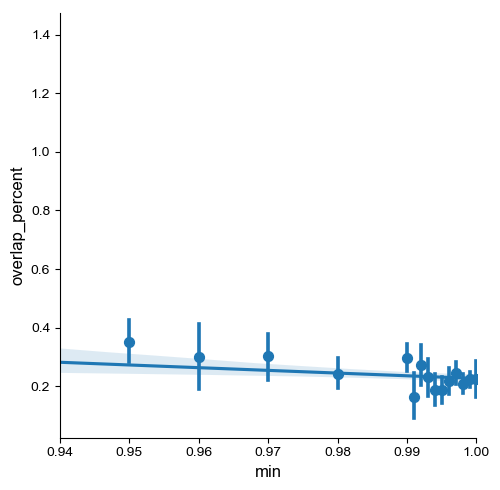

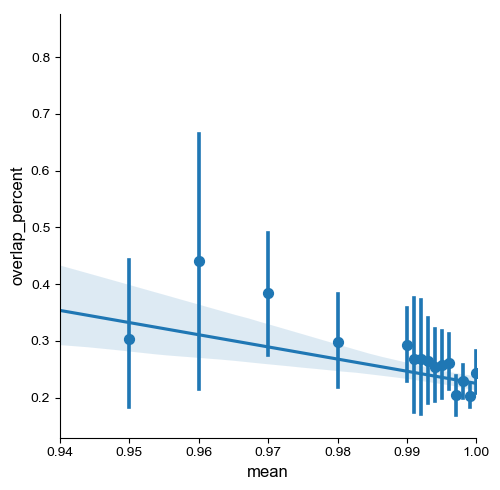

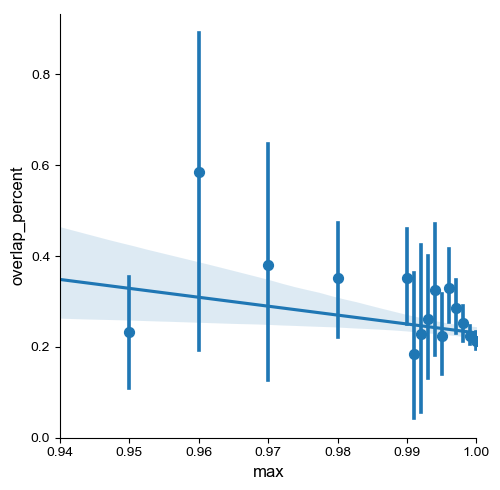

In [108]:
intersect_subset = intersect[intersect['masked_coverage'] > 0.7] # can change
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
intersect_subset['max'] = intersect_subset[amh_afr].max(axis=1) 
intersect_subset['min'] = intersect_subset[amh_afr].min(axis=1) 
intersect_subset.head()
#bins = [intersect['mean'].quantile(i) for i in np.arange(0.01,0.5,0.01)]
g = sns.lmplot(x='min',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
g = sns.lmplot(x='mean',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
g = sns.lmplot(x='max',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))

#### Odds ratio of being introgressed/nonintrogressed given different 3d difference thresholds

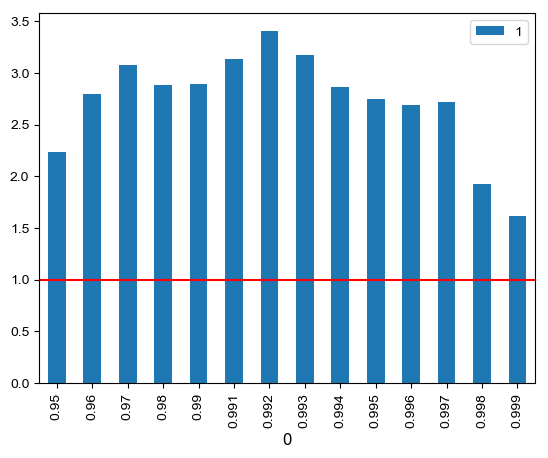

In [105]:
bars = []
intersect_subset = intersect[(intersect['masked_coverage'] > 0.7) ]

for i in [0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999]:
    intersect_subset = intersect_subset[(intersect_subset[amh_afr].mean(axis=1) < i)] # can change to max/min
    x = sum(intersect_subset['overlap_percent'] == 0)
    y = sum(intersect_subset['overlap_percent'] == 1)

    intersect_subset = intersect[(intersect[amh_afr].mean(axis=1) > i)] # can change to max/min
    a = sum(intersect_subset['overlap_percent'] == 0)
    b = sum(intersect_subset['overlap_percent'] == 1)
    bars.append((i,(y/x)/(b/a)))
pd.DataFrame(bars).plot.bar(x=0)
plt.axhline(y=1,color='red')

#### Regression approach

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
intersect_pos = intersect_subset[(intersect_subset['masked_coverage'] > 0.5) & ((intersect_subset['overlap_percent'] == 1))]
intersect_neg = intersect_subset[(intersect_subset['masked_coverage'] > 0.5) & ((intersect_subset['overlap_percent'] == 0))]
len(intersect_pos)
len(intersect_neg)
intersect_neg = intersect_neg.sample(n = len(intersect_pos))

intersect_subset = pd.concat([intersect_neg, intersect_pos],axis=0)
#intersect_subset['overlap_percent'] = np.ceil(intersect_subset['overlap_percent']) # if you want to round up
intersect_subset.head()

X = intersect_subset[['mean','masked_coverage']].values
y = intersect_subset['overlap_percent']
scaler = StandardScaler()
#scaler = MinMaxScaler()
X = scaler.fit_transform(X)
reg = LogisticRegression().fit(X, y)

reg.score(X, y)
#reg.intercept_
reg.coef_
# lower spearman = higher overlap percent
# more different 3d structure = more tolerant of introgression
# higher spearman = lower overlap percent
# more similar 3d structure = less tolerant of introgression
# higher coverage = higher

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


138

2255

,chr,windowStartPos,end,masked_coverage,AFR_ESN_female_HG03105,AFR_GWD_female_HG03539,AFR_LWK_female_NA19378,AFR_MSL_female_HG03212,AFR_YRI_female_NA18870,AFR_YRI_female_NA19159,overlap,overlap_percent,mean
1707,chr5,57147392,58195968,0.717817,0.999489,0.989216,0.999278,0.999455,0.988649,0.999310,0,0.0,0.995899
1511,chr4,141557760,142606336,0.679855,0.999601,0.999619,0.999731,0.993288,0.991036,0.999853,0,0.0,0.997188
583,chr2,82837504,83886080,0.700094,0.998519,0.998804,0.999146,0.998754,0.999588,0.998632,0,0.0,0.998907
1361,chr4,62914560,63963136,0.659805,0.998481,0.999077,0.999230,0.999159,0.999132,0.998974,0,0.0,0.999009
2217,chr6,149422080,150470656,0.586378,0.999760,0.999153,0.999449,0.999536,0.998708,0.999215,0,0.0,0.999304


/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4855072463768116

array([[-0.05753294,  0.05275685]])

#### Histogram/boxplot/violinplot visualization of differences in 3d structure per window based on overlap vs no overlap

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

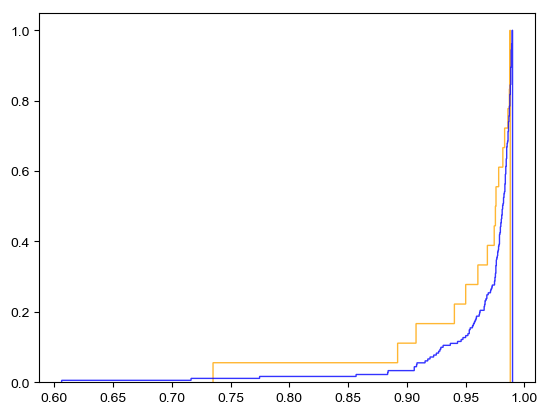

In [120]:
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
intersect_subset = intersect_subset[(intersect_subset['overlap_percent'] == 1) & (intersect_subset['mean'] < 0.99)] #change threshold
_ = plt.hist(intersect_subset['mean'] , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='orange',bins=1000)
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
intersect_subset = intersect_subset[(intersect_subset['overlap_percent'] == 0) & (intersect_subset['mean'] < 0.99)] # change threshold
_ = plt.hist(intersect_subset['mean'] , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='b',bins=1000)

# regions with introgression overlap=orange
# regions with no introgression overlap = blue


/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


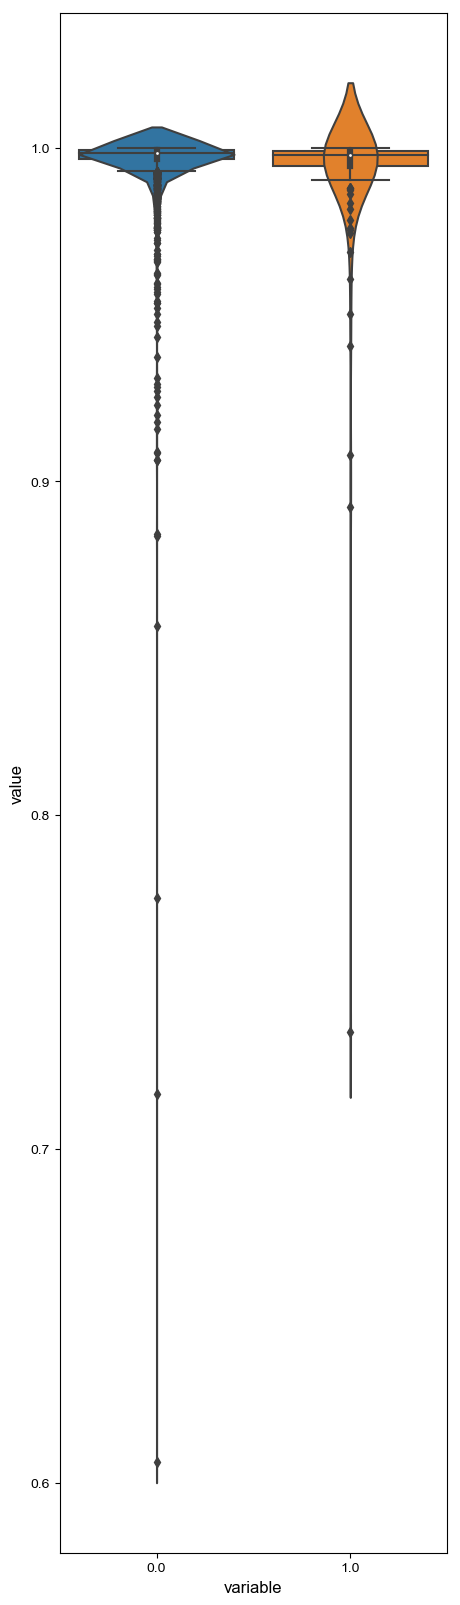

In [126]:
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]

intersect_subset = intersect_subset[(intersect_subset['overlap_percent'] == 0) | (intersect_subset['overlap_percent'] == 1)]#['spearman'].describe() # lower
intersect_subset.index = list(intersect_subset[['overlap_percent']].values.flatten())
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
fig = plt.figure(figsize=(5,20))
sns.violinplot(x='variable',y='value',data=intersect_subset[['mean']].T.melt())

sns.boxplot(x='variable',y='value',data=intersect_subset[['mean']].T.melt())

# regions with evidence of introgression have more 3d structure divergence from neanderthals than non-introgressed
# more desert overlap = more similar 3d structure

# regions with introgression overlap=orange
# regions with no introgression overlap = blue

### Focus on "segment"-level

In [46]:
from pybedtools import BedTool
afr_altai_comps = pd.DataFrame([], columns=['chr','windowStartPos','masked_coverage'])
for i in amh_afr:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman','masked_coverage']]
    pair.columns = ['chr','windowStartPos',i,'masked_coverage']
    afr_altai_comps = afr_altai_comps.merge(pair, on =['chr','windowStartPos','masked_coverage'],how='outer')
afr_altai_comps['end'] = afr_altai_comps['windowStartPos']+2**20
afr_altai_comps = afr_altai_comps[['chr','windowStartPos','end','masked_coverage'] + amh_afr]
afr_altai_comps['mean'] = afr_altai_comps[amh_afr].mean(axis=1) 
afr_altai_comps_bed = BedTool.from_dataframe(afr_altai_comps)

#browning
segs_df = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
#vernot
#segs_df = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
#segs_df = segs_df.iloc[:,0:3] 
#deserts
#segs_df = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
#segs_df = segs_df.iloc[:,0:3] 
#segs_df.iloc[:,0] = segs_df.iloc[:,0].apply(lambda x: 'chr%s' % x)

segs_df.columns = ['chrm','start','stop']
segs = BedTool.from_dataframe(segs_df)
intersect = segs.intersect(afr_altai_comps_bed,wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = ['chrm','start','stop'] + list(afr_altai_comps.columns) + ['overlap']

intersect = intersect.groupby(['chrm','start','stop']).agg({'mean':'min'}).reset_index() #can change 'min'
intersect = segs_df.merge(intersect, on=['chrm','start','stop'] )
len(segs_df) == len(intersect)
try:
    len(intersect[intersect['mean'] == '.']) #!check why these don't have any window overlap
    intersect = intersect[intersect['mean'] != '.']
except:
    pass

intersect.head()

True

29

,chrm,start,stop,mean
0,chr1,2369230,2632289,0.99802152899054
2,chr1,4004406,4835531,0.9904815084270072
3,chr1,5023290,5081951,0.9904815084270072
4,chr1,5145773,5303791,0.9904815084270072
5,chr1,9512228,9704296,0.9964164068321621


In [47]:
# Shuffle background
segs_shuffle = segs.shuffle(genome='hg19', seed=42)
segs_shuffle_df = segs_shuffle.to_dataframe()
segs_shuffle_df.columns = ['chrm','start','stop']
intersect_shuffle = segs_shuffle.intersect(afr_altai_comps_bed,wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect_shuffle.columns = ['chrm','start','stop'] + list(afr_altai_comps.columns) + ['overlap']
intersect_shuffle = intersect_shuffle.groupby(['chrm','start','stop']).agg({'mean':'min'}).reset_index()
intersect_shuffle = segs_shuffle_df.merge(intersect_shuffle, on=['chrm','start','stop'] )
len(segs_shuffle_df) == len(intersect_shuffle)
try:
    len(intersect_shuffle[intersect_shuffle['mean'] == '.']) #!check why these don't have any window overlap
    intersect_shuffle = intersect_shuffle[intersect_shuffle['mean'] != '.']
except:
    pass

True

170

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


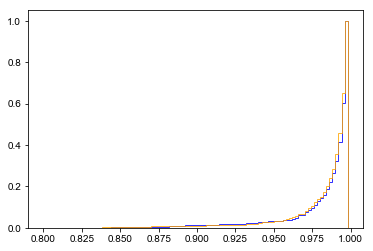

In [48]:
_ = plt.hist([float(i) for i in intersect_shuffle[['mean']].values.flatten()], normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='b',bins = np.arange(0.8,1,0.002))
_ = plt.hist([float(i) for i in intersect[['mean']].values.flatten()] , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='orange',bins = np.arange(0.8,1,0.002))

### Relationship between haplotype frequency and 3d genome similarity between Altai-AFR

In [50]:
intersect.head()

,chrm,start,stop,AFA,AFR,AMR,EAS,EUR,PNG,SAS,...,end,masked_coverage,AFR_ESN_female_HG03105,AFR_GWD_female_HG03539,AFR_LWK_female_NA19378,AFR_MSL_female_HG03212,AFR_YRI_female_NA18870,AFR_YRI_female_NA19159,mean,overlap
0,chr1,2903158,2996556,0.028665,0.00198,0.20389,0.198415,0.132705,0.00926,0.03885,...,-1,.,.,.,.,.,.,.,.,0
1,chr1,3015134,3046826,0.012740,0.00000,0.03026,0.067460,0.063620,0.00000,0.03272,...,-1,.,.,.,.,.,.,.,.,0
2,chr1,3066509,3209504,0.003180,0.00000,0.03026,0.100200,0.005960,0.07407,0.07975,...,-1,.,.,.,.,.,.,.,.,0
3,chr1,3301585,3335874,0.003180,0.00000,0.00288,0.007940,0.010930,0.00000,0.04090,...,-1,.,.,.,.,.,.,.,.,0
4,chr1,3352783,3450985,0.023885,0.00000,0.14697,0.140375,0.058650,0.12963,0.10327,...,-1,.,.,.,.,.,.,.,.,0


In [63]:
from pybedtools import BedTool
afr_altai_comps = pd.DataFrame([], columns=['chr','windowStartPos','masked_coverage'])
for i in amh_afr:
    pair = pairs[(i,'altai')][['chr','windowStartPos','spearman','masked_coverage']]
    pair.columns = ['chr','windowStartPos',i,'masked_coverage']
    afr_altai_comps = afr_altai_comps.merge(pair, on =['chr','windowStartPos','masked_coverage'],how='outer')
afr_altai_comps['end'] = afr_altai_comps['windowStartPos']+2**20
afr_altai_comps = afr_altai_comps[['chr','windowStartPos','end','masked_coverage'] + amh_afr]
afr_altai_comps['mean'] = afr_altai_comps[amh_afr].mean(axis=1) 
afr_altai_comps_bed = BedTool.from_dataframe(afr_altai_comps)

#vernot
segs_df = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
segs_df.columns = ['chrm','start','stop','AFA','AFR','AMR','EAS','EUR','PNG','SAS','numSnps','hapLen']


segs = BedTool.from_dataframe(segs_df)
intersect = segs.intersect(afr_altai_comps_bed,wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = ['chrm','start','stop'] + list(segs_df.columns)[3:] + list(afr_altai_comps.columns) + ['overlap'] 
len(intersect[intersect['mean'] == "."]) #!check why these don't have any window overlap
intersect = intersect[intersect['mean'] != "."]
intersect['mean'] = pd.to_numeric(intersect['mean'])
intersect = intersect.groupby(['chrm','start','stop']).agg({'mean':'mean'}).reset_index() #can change 'min'
intersect = segs_df.merge(intersect, on=['chrm','start','stop'] )
len(segs_df) == len(intersect)


intersect.head()

144

False

,chrm,start,stop,AFA,AFR,AMR,EAS,EUR,PNG,SAS,numSnps,hapLen,mean
0,chr1,4165583,4277602,0.00318,0.00000,0.02233,0.04067,0.03479,0.00000,0.07055,113,123636,0.995010
1,chr1,4440620,4478442,0.02229,0.00099,0.14697,0.10020,0.08350,0.01852,0.10532,85,63330,0.995010
2,chr1,4489344,4504571,0.03822,0.00397,0.32133,0.05853,0.15308,0.00000,0.15644,30,26581,0.995010
3,chr1,4529573,4631404,0.02229,0.00298,0.09942,0.02778,0.16203,0.07407,0.10634,104,103633,0.995010
4,chr1,4857794,4882004,0.00000,0.00000,0.00000,0.00595,0.00497,0.00000,0.08896,16,27857,0.992746


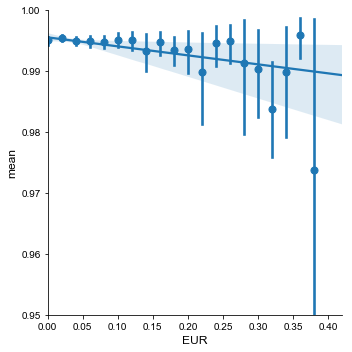

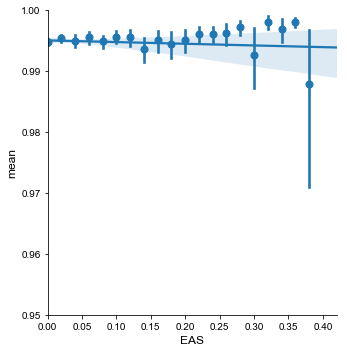

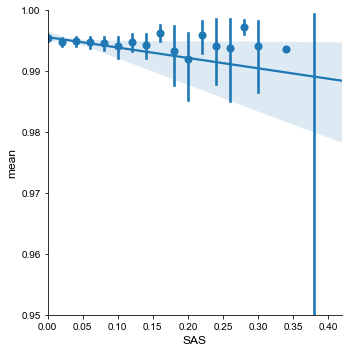

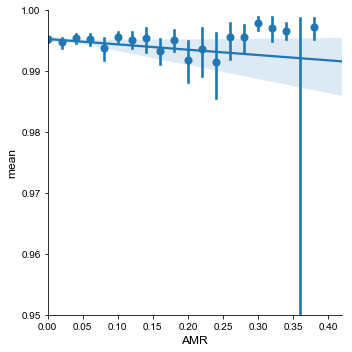

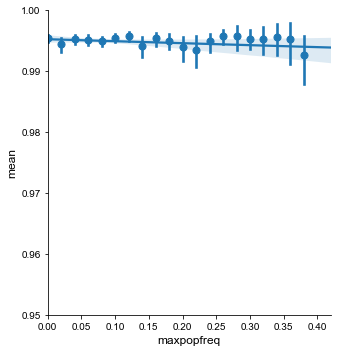

In [67]:
intersect['mean'] = pd.to_numeric(intersect['mean'])
intersect['maxpopfreq'] = intersect[['AMR','EAS','EUR','PNG','SAS']].max(axis=1)
g = sns.lmplot(x='EUR',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='EAS',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='SAS',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='AMR',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

g = sns.lmplot(x='maxpopfreq',y='mean', data=intersect,x_bins=np.arange(0,.4,0.02))
_ = g.set(xlim=(0,0.42))
_ = g.set(ylim=(0.95,1))

## 3d Variable regions in AFR

In [70]:
## read in AFR-AFR (non harmonized pairs)

coverage = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/harmonized/coveragePerIndiv/coverage_AFR_GWD_female_HG03539.txt",sep="\t",header=None)
coverage.columns= ['chr','windowStartPos','coverage','masked_coverage']
regionsToKeep = coverage[coverage['coverage'] == 1][['chr','windowStartPos']]
len(regionsToKeep) # only keep regions with full coverage in 1kg!!

# This takes a few minutes
indivs_afr = ['AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212']

pairs_afr = {}
for i1 in indivs_afr:
    print(i1)
    for i2 in indivs_afr:
        try:
            pair = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/afr_nonHarmonized/pairwiseComparisons/3dcomp_%s_vs_%s.txt" % (i1,i2),sep="\t")
            coverage1 = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/afr_nonHarmonized/coveragePerIndiv/coverage_%s.txt" % i1,sep="\t",header=None)
            coverage1.columns = ['chr','windowStartPos','%s_coverage'% i1]
            coverage2 = pd.read_csv("/dors/capra_lab/users/evonne/nean_3d/comparisonsPairwise/data/afr_nonHarmonized/coveragePerIndiv/coverage_%s.txt" % i2,sep="\t",header=None)
            coverage2.columns = ['chr','windowStartPos','%s_coverage'% i2]
            pair = pair.merge(coverage1).merge(coverage2)
            pair = regionsToKeep.merge(pair, how='inner',on=['chr','windowStartPos']) # only keep windows with full coverage in 1kg
            pairs_afr[(i1,i2)] = pair
        except FileNotFoundError:
            pass

len(pairs_afr) # should be 6 when all pair-wise comparisons are finished


4999

AFR_ESN_female_HG03105
AFR_GWD_female_HG03539
AFR_LWK_female_NA19378
AFR_MSL_female_HG03212


6

In [86]:
afr_comps = pd.DataFrame([], columns=['chr','windowStartPos'])
afr_comps_keys =[]
for k,v in pairs_afr.items():
    pair = v[['chr','windowStartPos','spearman']]
    pair.columns = ['chr','windowStartPos','_'.join(k)]
    afr_comps = afr_comps.merge(pair, on =['chr','windowStartPos'],how='outer')
    afr_comps_keys.append('_'.join(k)) 
    
afr_comps['end'] = afr_comps['windowStartPos'] + 2**20
afr_comps = afr_comps[['chr','windowStartPos','end'] + afr_comps_keys]
afr_comps[afr_comps['chr'] == 'chr18'].head()
afr_comps_keys


,chr,windowStartPos,end,AFR_LWK_female_NA19378_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_LWK_female_NA19378,AFR_LWK_female_NA19378_AFR_GWD_female_HG03539,AFR_MSL_female_HG03212_AFR_GWD_female_HG03539,AFR_GWD_female_HG03539_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_ESN_female_HG03105
4306,chr18,524288,1572864,0.999605,0.999623,0.999735,0.999223,0.999806,0.999056
4307,chr18,1048576,2097152,0.998667,0.994956,0.997489,0.998441,0.997293,0.994071
4308,chr18,1572864,2621440,0.989473,0.989933,0.996918,0.994499,0.993556,0.996037
4309,chr18,2097152,3145728,0.996914,0.997540,0.997056,0.997927,0.998145,0.998749
4310,chr18,2621440,3670016,0.998907,0.998675,0.997679,0.998321,0.998619,0.999530


['AFR_LWK_female_NA19378_AFR_ESN_female_HG03105',
 'AFR_MSL_female_HG03212_AFR_LWK_female_NA19378',
 'AFR_LWK_female_NA19378_AFR_GWD_female_HG03539',
 'AFR_MSL_female_HG03212_AFR_GWD_female_HG03539',
 'AFR_GWD_female_HG03539_AFR_ESN_female_HG03105',
 'AFR_MSL_female_HG03212_AFR_ESN_female_HG03105']

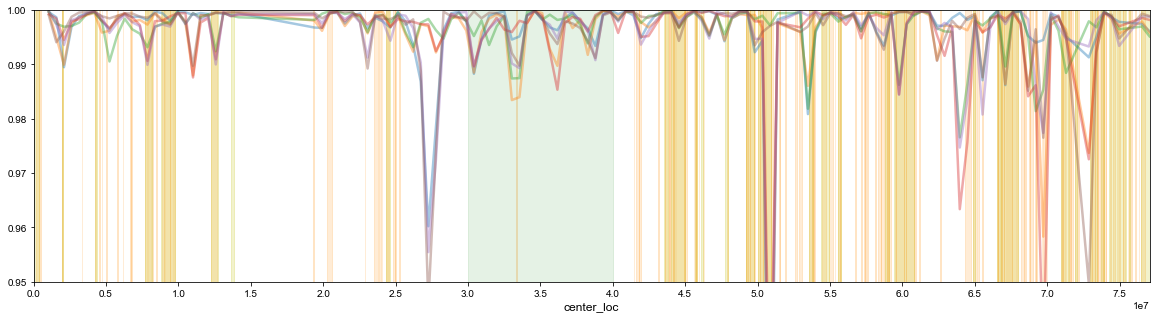

In [85]:
# adjust these
chrm = 'chr18'
pair = afr_comps


fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
maxLoc = 0
num = 0
start = 0 # can change to look at a set of windows
end = pair['windowStartPos'].max() + 2**20 # can change to look at a single set of windows

#start = 50500000 # adjust
#end = 51500000 #adjust


num+=1
pair['center_loc'] = (pair['windowStartPos'] + pair['windowStartPos'] + 2**20)/2 + maxLoc # center_loc is the midway point in the region
_ = pair[(pair['chr'] == chrm) & (pair['windowStartPos'] > start-2**20 ) & (pair['windowStartPos'] < end+2**20 ) ].plot(kind='line',x='center_loc',y=afr_comps_keys, ax=ax, alpha=0.4, linewidth=2.5)

maxLoc = pair[pair['chr'] == chrm]['center_loc'].max() + 10 
_ = ax.set_xticks(np.arange(0,maxLoc,5000000))
_ = ax.get_legend().remove()
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.92,1)
#plt.show()


#fig = plt.figure(figsize=(20,5))
#ax = fig.add_subplot(111)

# Read in vernot, browning segments and sankararaman deserts
vernot_segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
vernot_segs = vernot_segs[vernot_segs[0]==chrm]
vernot_segs['len'] = vernot_segs[2] - vernot_segs[1]
_ = plt.broken_barh([(i,j) for i,j in zip(vernot_segs[1],vernot_segs['len'])], (0,1),color='darkorange',alpha=0.16)

sprime_segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
sprime_segs = sprime_segs[sprime_segs[0]==chrm]
sprime_segs['len'] = sprime_segs[2] - sprime_segs[1]
_ = plt.broken_barh([(i,j) for i,j in zip(sprime_segs[1],sprime_segs['len'])], (0,1),color='y',alpha=0.2)

deserts = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
deserts.iloc[:,0] = deserts.iloc[:,0].apply(lambda x: 'chr%s' % x)
deserts['len'] = deserts[2] - deserts[1]
deserts = deserts[deserts[0]==chrm]
_ = plt.broken_barh([(i,j) for i,j in zip(deserts[1],deserts['len'])], (0,1),color='g',alpha=0.1)

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist = blacklist[blacklist[0]==chrm]
blacklist[1] = blacklist[1] - 2**20/2
blacklist[2] = blacklist[2] + 2**20/2
blacklist['len'] = blacklist[2] - blacklist[1]
#_ = plt.broken_barh([(i,j) for i,j in zip(blacklist[1],blacklist['len'])], (0,1),color='k',alpha=0.2)

_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0.95,1)

_ = ax.set_xticks(np.arange(0,maxLoc,5000000))


plt.show()

### Focus on "window"-level

,chr,windowStartPos,end,AFR_LWK_female_NA19378_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_LWK_female_NA19378,AFR_LWK_female_NA19378_AFR_GWD_female_HG03539,AFR_MSL_female_HG03212_AFR_GWD_female_HG03539,AFR_GWD_female_HG03539_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_ESN_female_HG03105,overlap,overlap_percent
0,chr1,524288,1572864,0.998733,0.997704,0.997649,0.998332,0.998443,0.998584,0,0.000000
1,chr1,1048576,2097152,0.998729,0.996797,0.994205,0.987339,0.993556,0.997439,0,0.000000
2,chr1,1572864,2621440,0.996903,0.996671,0.996111,0.996139,0.997456,0.999408,252210,0.240526
3,chr1,4194304,5242880,0.997893,0.993823,0.985601,0.992595,0.987375,0.995625,796995,0.760074
4,chr1,4718592,5767168,0.996218,0.995537,0.980396,0.987696,0.981955,0.997398,333618,0.318163


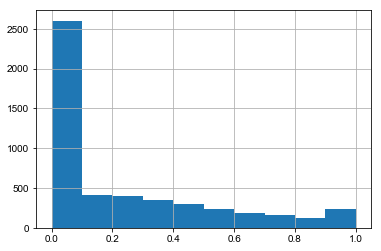

In [148]:
from pybedtools import BedTool

blacklist = pd.read_csv('/dors/capra_lab/users/evonne/resources/blacklist/blacklist_plus_gaps_hg19.bed',sep='\t',header=None)
blacklist[1] = blacklist[1]# - 2**20/2
blacklist[2] = blacklist[2] #+ 2**20/2
blacklist[[1,2]] = blacklist[[1,2]].clip(0).astype(int)

blacklist_bed = BedTool.from_dataframe(blacklist)
afr_comps_bed = BedTool.from_dataframe(afr_comps)

# uncomment if you want to exclude blacklist
#afr_comps_bed = afr_comps_bed.intersect(blacklist_bed,v=True) #3494 out of 5334

#browning
segs = pd.read_csv('/dors/capra_lab/users/evonne/nean_h2/paper/data/input_neanderthal_regions/ALLEUR_sprime_segments_neanMatchingFilter.bed',sep="\t",header=None)
#vernot
#segs = pd.read_csv('/gpfs51/dors2/capra_lab/data/ancient_dna/archaic_hominin/vernot16/introgressed_tag_snp_frequencies/all_tag_snps.EUR.merged.ALL.0.3_R2_cluster.1KG_phase3_essentials.median_af.bed.extended_LD',sep="\t",header=None)
#deserts
#segs = pd.read_csv('/dors/capra_lab/projects/neanderthal_predixcan/data/introgression_overlap/sankararaman_calls/sankararaman_nean_deserts.bed',sep="\t",header=None)
#segs = segs.iloc[:,0:3] 
#segs.iloc[:,0] = segs.iloc[:,0].apply(lambda x: 'chr%s' % x)

segs = BedTool.from_dataframe(segs)
intersect = afr_comps_bed.intersect(segs.merge(),wao=True).to_dataframe(disable_auto_names=True, header=None)
intersect.columns = list(afr_comps.columns) + ['_','_','_','overlap']

intersect = intersect.groupby(['chr','windowStartPos','end']).agg({'overlap':'sum'}).reset_index()
intersect = afr_comps.merge(intersect, on=['chr','windowStartPos','end'] )
intersect['overlap_percent'] = intersect['overlap']/(intersect['end'] -intersect['windowStartPos'])
intersect.head()
intersect['overlap_percent'].hist()

#### Histogram/boxplot/violinplot visualization of differences in 3d structure per window based on overlap vs no overlap

,chr,windowStartPos,end,AFR_LWK_female_NA19378_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_LWK_female_NA19378,AFR_LWK_female_NA19378_AFR_GWD_female_HG03539,AFR_MSL_female_HG03212_AFR_GWD_female_HG03539,AFR_GWD_female_HG03539_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_ESN_female_HG03105,overlap,overlap_percent,mean
0,chr1,524288,1572864,0.998733,0.997704,0.997649,0.998332,0.998443,0.998584,0,0.000000,0.998241
1,chr1,1048576,2097152,0.998729,0.996797,0.994205,0.987339,0.993556,0.997439,0,0.000000,0.994678
2,chr1,1572864,2621440,0.996903,0.996671,0.996111,0.996139,0.997456,0.999408,0,0.000000,0.997115
3,chr1,4194304,5242880,0.997893,0.993823,0.985601,0.992595,0.987375,0.995625,405992,0.387184,0.992152
4,chr1,4718592,5767168,0.996218,0.995537,0.980396,0.987696,0.981955,0.997398,203176,0.193764,0.989867


3561

1438

3546

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(0.0, 0.2)

(0.7, 1)

0.023881558234956624

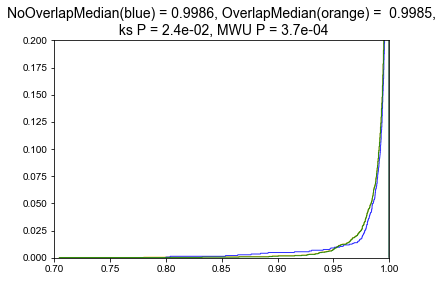

In [146]:
intersect_subset = intersect
intersect_subset['mean'] = intersect_subset[afr_comps_keys].mean(axis=1)  # can change to min/max/mean
intersect_subset.head()
full_overlap = intersect_subset[(intersect_subset['overlap_percent'] > 0)]['mean'].values
no_overlap = intersect_subset[(intersect_subset['overlap_percent'] == 0)]['mean'].values
partial_overlap = intersect_subset[(intersect_subset['overlap_percent'] > 0) & (intersect_subset['overlap_percent'] < 1)]['mean'].values
len(full_overlap)
len(no_overlap)
len(partial_overlap)
_ = plt.hist(full_overlap , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='orange',bins=1000)
_ = plt.hist(no_overlap , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='b',bins=1000)
_ = plt.hist(partial_overlap , normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='g',bins=1000)
plt.ylim((None, .2)) 
plt.xlim((0.7, 1)) 



ksP = stats.ks_2samp(no_overlap, full_overlap)
ksP[1]
mwuP = stats.mannwhitneyu(no_overlap, full_overlap)
noOverlapMed = np.median(no_overlap)
overlapMed = np.median(full_overlap)

_ = plt.title('NoOverlapMedian(blue) = %0.4f, OverlapMedian(orange) =  %0.4f,\n ks P = %0.1e, MWU P = %0.1e' % (noOverlapMed, overlapMed, ksP[1], mwuP[1]))

# regions with introgression overlap=orange
# regions with no introgression overlap = blue


/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


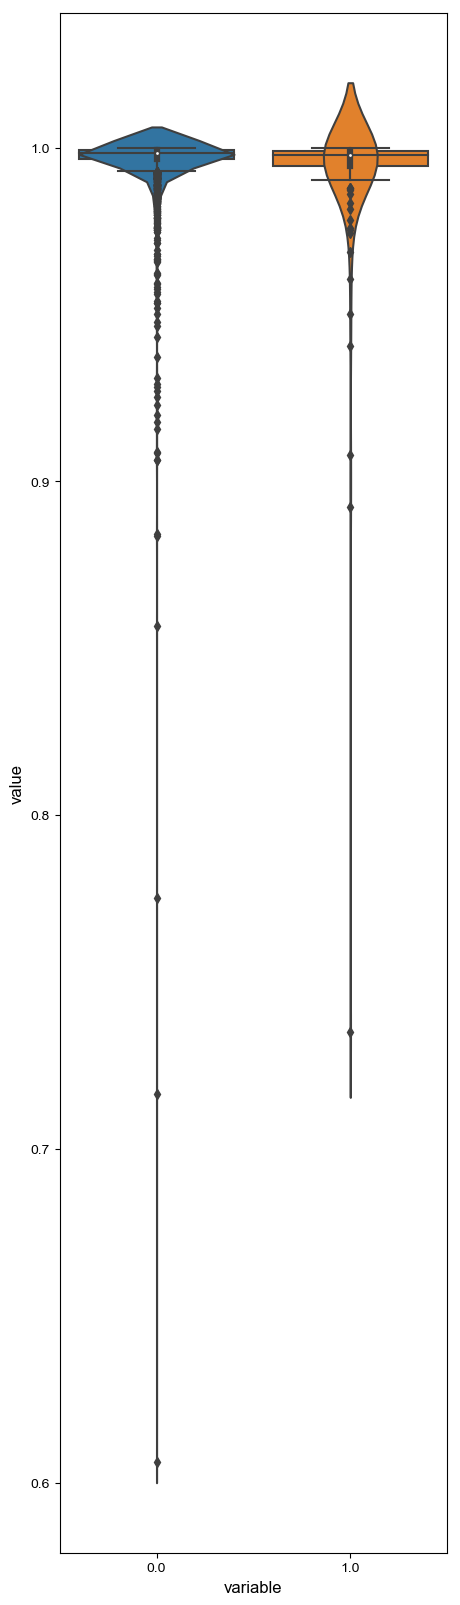

In [126]:
intersect_subset = intersect[(intersect['masked_coverage'] > 0.5) ]

intersect_subset = intersect_subset[(intersect_subset['overlap_percent'] == 0) | (intersect_subset['overlap_percent'] == 1)]#['spearman'].describe() # lower
intersect_subset.index = list(intersect_subset[['overlap_percent']].values.flatten())
intersect_subset['mean'] = intersect_subset[amh_afr].mean(axis=1) 
fig = plt.figure(figsize=(5,20))
sns.violinplot(x='variable',y='value',data=intersect_subset[['mean']].T.melt())

sns.boxplot(x='variable',y='value',data=intersect_subset[['mean']].T.melt())

# regions with evidence of introgression have more 3d structure divergence from neanderthals than non-introgressed
# more desert overlap = more similar 3d structure

# regions with introgression overlap=orange
# regions with no introgression overlap = blue

#### Correlation between coverage and window overlap with introgressed

,chr,windowStartPos,end,AFR_LWK_female_NA19378_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_LWK_female_NA19378,AFR_LWK_female_NA19378_AFR_GWD_female_HG03539,AFR_MSL_female_HG03212_AFR_GWD_female_HG03539,AFR_GWD_female_HG03539_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_ESN_female_HG03105,overlap,overlap_percent,mean,max,min
0,chr1,524288,1572864,0.998733,0.997704,0.997649,0.998332,0.998443,0.998584,0,0.000000,0.998241,0.998733,0.997649
1,chr1,1048576,2097152,0.998729,0.996797,0.994205,0.987339,0.993556,0.997439,0,0.000000,0.994678,0.998729,0.987339
2,chr1,1572864,2621440,0.996903,0.996671,0.996111,0.996139,0.997456,0.999408,252210,0.240526,0.997115,0.999408,0.996111
3,chr1,4194304,5242880,0.997893,0.993823,0.985601,0.992595,0.987375,0.995625,796995,0.760074,0.992152,0.997893,0.985601
4,chr1,4718592,5767168,0.996218,0.995537,0.980396,0.987696,0.981955,0.997398,333618,0.318163,0.989867,0.997398,0.980396


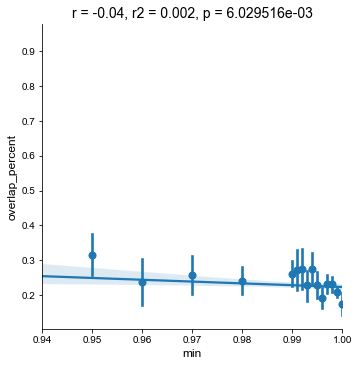

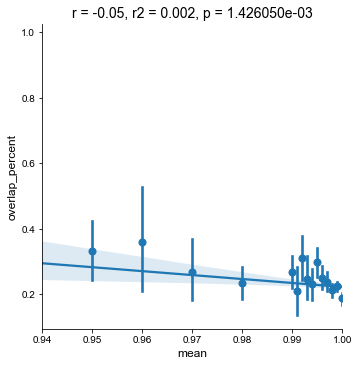

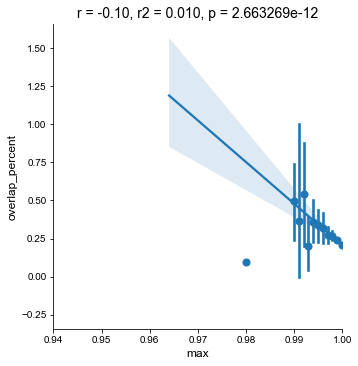

In [92]:
intersect_subset = intersect
intersect_subset['mean'] = intersect_subset[afr_comps_keys].mean(axis=1) 
intersect_subset['max'] = intersect_subset[afr_comps_keys].max(axis=1) 
intersect_subset['min'] = intersect_subset[afr_comps_keys].min(axis=1) 
intersect_subset.head()
#bins = [intersect['mean'].quantile(i) for i in np.arange(0.01,0.5,0.01)]
g = sns.lmplot(x='min',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
slope, intercept, r, p, se = stats.linregress(intersect_subset['min'].values, intersect_subset['overlap_percent'].values)
_ = plt.title('r = %0.2f, r2 = %0.3f, p = %e' % (r, r**2, p))


g = sns.lmplot(x='mean',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
slope, intercept, r, p, se = stats.linregress(intersect_subset['mean'].values, intersect_subset['overlap_percent'].values)
_ = plt.title('r = %0.2f, r2 = %0.3f, p = %e' % (r, r**2, p))

g = sns.lmplot(x='max',y='overlap_percent',data = intersect_subset,x_bins=[0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
g.set(xlim=(0.94, 1))
slope, intercept, r, p, se = stats.linregress(intersect_subset['max'].values, intersect_subset['overlap_percent'].values)
_ = plt.title('r = %0.2f, r2 = %0.3f, p = %e' % (r, r**2, p))

#### Regression approach

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
intersect_subset = intersect
intersect_subset['mean'] = intersect_subset[afr_comps_keys].mean(axis=1) 
intersect_pos = intersect_subset[(intersect_subset['overlap_percent'] == 1)]
intersect_neg = intersect_subset[(intersect_subset['overlap_percent'] == 0)]
len(intersect_pos)
len(intersect_neg)
intersect_neg = intersect_neg.sample(n = len(intersect_pos))

intersect_subset = pd.concat([intersect_neg, intersect_pos],axis=0)
#intersect_subset['overlap_percent'] = np.ceil(intersect_subset['overlap_percent']) # if you want to round up
intersect_subset.head()

X = intersect_subset[['mean']].values
y = intersect_subset['overlap_percent']
scaler = StandardScaler()
#scaler = MinMaxScaler()
X = scaler.fit_transform(X)
reg = LogisticRegression().fit(X, y)

reg.score(X, y)
#reg.intercept_
reg.coef_
# negative = less 3d similar = more introgression

144

2322

,chr,windowStartPos,end,AFR_LWK_female_NA19378_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_LWK_female_NA19378,AFR_LWK_female_NA19378_AFR_GWD_female_HG03539,AFR_MSL_female_HG03212_AFR_GWD_female_HG03539,AFR_GWD_female_HG03539_AFR_ESN_female_HG03105,AFR_MSL_female_HG03212_AFR_ESN_female_HG03105,overlap,overlap_percent,mean
2592,chr8,100663296,101711872,0.999469,0.999337,0.999557,0.999246,0.999089,0.999730,0,0.0,0.999405
613,chr2,130023424,131072000,0.998231,0.999313,0.999228,0.999696,0.997303,0.997491,0,0.0,0.998544
4788,chrX,25165824,26214400,0.998671,0.998043,0.999432,0.998962,0.999036,0.997243,0,0.0,0.998565
652,chr2,152043520,153092096,0.991649,0.993862,0.993888,0.999637,0.999450,0.999289,0,0.0,0.996296
1984,chr6,81788928,82837504,0.998367,0.998229,0.997561,0.997467,0.997604,0.998798,0,0.0,0.998004


/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5625

array([[-0.55639312]])

In [162]:
import statsmodels.api as sm
log_reg = sm.Logit(y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.680147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        overlap_percent   No. Observations:                  288
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                            0
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                 0.01876
Time:                        13:23:45   Log-Likelihood:                -195.88
converged:                       True   LL-Null:                       -199.63
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5828      0.273     -2.132      0.033      -1.119      -0.047
==============================================================================
"""